In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./AirPassengers.csv")

In [3]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.shape

(144, 2)

In [6]:
df.columns = ["Time","Passenger"]

In [7]:
df.head()

,Time,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df["Time"] = pd.to_datetime(df["Time"])

In [9]:
df.head()

,Time,Passenger
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.dtypes

Time         datetime64[ns]
Passenger             int64
dtype: object

In [11]:
df.set_index(df["Time"],inplace = True)

In [12]:
df.head()

,Time,Passenger
Time,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [13]:
df.drop("Time", inplace = True, axis = 1)

In [14]:
# Checking if the data is stationary or non-stationary

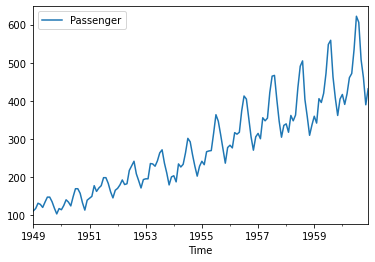

In [15]:
df.plot()

In [16]:
# Conclusion
#1. The data is non-stationary
#2. From the graph, we find seasonality in the data
#3. The data has auto-correlation

In [17]:
#The above method is a visualization method to check stationality in the data.
# The 2nd method to check stationality is to perform Adfuller

In [18]:
# Adfuller test runs on hypothesis to check stationality
# Null Hypothesis - It says that Time-Series is not stationary
# Alternate Hypothesis - it says that Time-Series is stationary

In [19]:
adf = adfuller(df["Passenger"])

In [20]:
adf #First Value - adf test statistics, Second Value - p value , Third Value - Number of lags (After how many months is the seasonality repeating), Fourth Value - Number of records without the lag

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [21]:
# Since the p value is more than 0.05, we will accept the Null Hypothesis i.e. Reject the Alternate Hypothesis.

In [22]:
# Performing First Order Differentiation to make the time series Stationary

In [23]:
df["first_difference"] = df["Passenger"]-df["Passenger"].shift(1)

In [24]:
df.head()

,Passenger,first_difference
Time,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


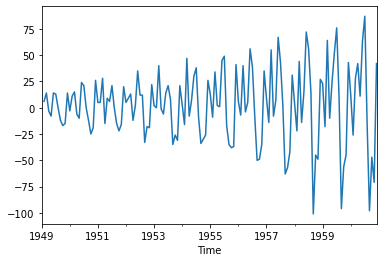

In [25]:
df["first_difference"].plot()

In [26]:
adf = adfuller(df["first_difference"].dropna())

In [27]:
adf

(-2.8292668241699923,
 0.054213290283826474,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [28]:
#For building a time series model we need to know three values 
# First Value : p - p stands for the order of the model (For eg. ar1, a2, ar3)
# Second Value: q - q stands for the moving average order of the model (For eg. ma1, ma2, ma3)
# Third Value: d - d stands for order of differentiation of the model (For eg. 1st order differentiation, 2nd order differentiation, 3rd order differentiation, etc)


In [29]:
# We get all these values by looking at the acf (Auto Correlation Function) plot or the pacf(Partial Auto Correlation Function) plot

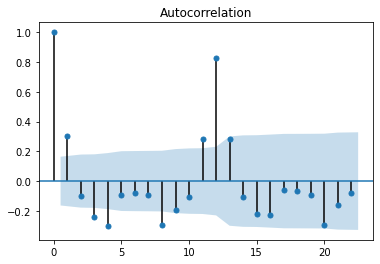

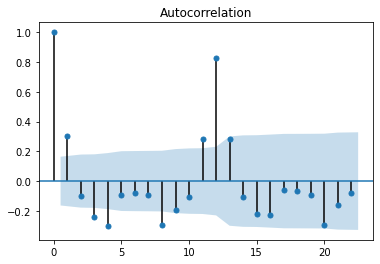

In [30]:
plot_acf(df["first_difference"].dropna())

In [31]:
# We consider acf plot as the best identification method to find our q value. We observe the decline in the graph towards 0. From the above graph we conclude that the q value is 1.

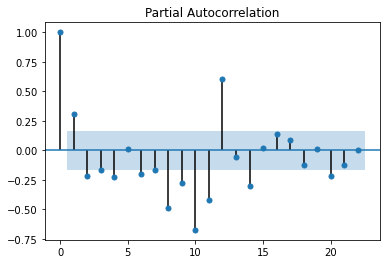

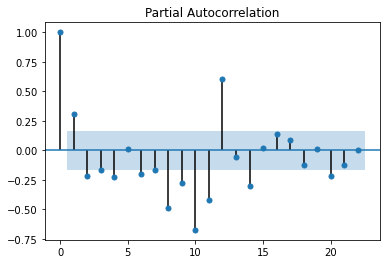

In [32]:
plot_pacf(df["first_difference"].dropna())

In [33]:
# We consider the pacf plot as the best identification method for the p value. Here also we see the decline and take the value of p. From the above graph we can see that the value of p is 1.

In [34]:
# As done previously we took the first order difference in order to make our time series stationary. Hence, d = 1.

In [36]:
## Fiting ARIMA Model

In [37]:
arima = ARIMA(df["Passenger"], order = (1,1,1))

In [38]:
arima = arima.fit()

In [39]:
df["forecast"] = arima.predict(start = 135, end = 160, dynamic = True)

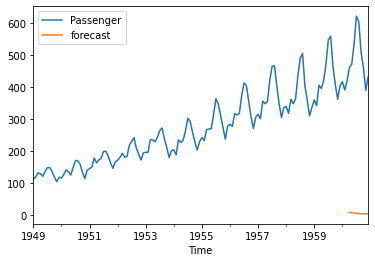

In [40]:
df[["Passenger","forecast"]].plot()

In [41]:
# The above prediction is not good because the data has seasonality. 

In [42]:
sarima = SARIMAX(df["Passenger"], order = (1,1,1), seasonal_order = (1,1,1,12))

In [43]:
sarima = sarima.fit()

In [44]:
df["sarima_forecast"] = sarima.predict( start = 135, end = 160, dynamic = True)

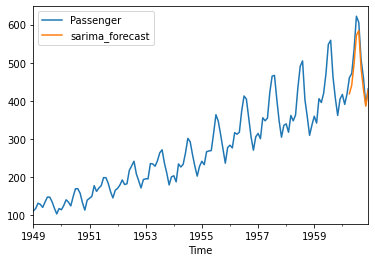

In [45]:
df[["Passenger","sarima_forecast"]].plot()

In [46]:
# Generating future dates

In [47]:
future_days = [df.index[-1]+pd.tseries.offsets.DateOffset(months = x) for x in range(36)]

In [48]:
future_days = future_days[1:]

In [49]:
future_days

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-01 00:00:00'),
 Timestamp('1963-05-

In [50]:
df

,Passenger,first_difference,forecast,sarima_forecast
Time,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN
...,...,...,...,...
1960-08-01,606,-16.0,4.273699,584.382595
1960-09-01,508,-98.0,3.841442,484.772380
1960-10-01,461,-47.0,3.521570,430.911001


In [51]:
new_df = pd.DataFrame(index = future_days, columns=df.columns)

In [52]:
new_df

,Passenger,first_difference,forecast,sarima_forecast
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN


In [53]:
final_df = pd.concat([df,new_df])

In [54]:
final_df

,Passenger,first_difference,forecast,sarima_forecast
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN
...,...,...,...,...
1963-07-01,NaN,NaN,NaN,NaN
1963-08-01,NaN,NaN,NaN,NaN
1963-09-01,NaN,NaN,NaN,NaN
1963-10-01,NaN,NaN,NaN,NaN


In [55]:
final_df['sarima_forecast'] = sarima.predict(start = 135, end = 178, dynamic = True)

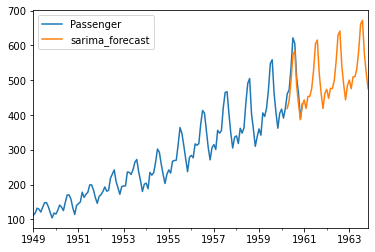

In [56]:
final_df[['Passenger','sarima_forecast']].plot()